# Recommendaation System Assignment
## Book data
Build a recommender system by using cosine simillarties score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.metrics import pairwise_distances
from sklearn.decomposition import TruncatedSVD

Checking Encoding of file, Since default encoding wasnt working

In [2]:
import chardet
with open('book.csv', 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.720858435715977, 'language': ''}


In [3]:
data = pd.read_csv('book.csv', encoding='iso-8859-1', index_col=0)

In [4]:
data.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


#### Getting rid of duplicate values

In [5]:
data.duplicated().sum()

2

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated(['User.ID','Book.Title']).sum()

5

In [8]:
data.drop_duplicates(['User.ID','Book.Title'], inplace=True)

In [9]:
data.shape

(9993, 3)

#### Exploring data

In [10]:
data['User.ID'].nunique()

2182

In [11]:
data['Book.Title'].nunique()

9659

<AxesSubplot:xlabel='Book.Rating', ylabel='count'>

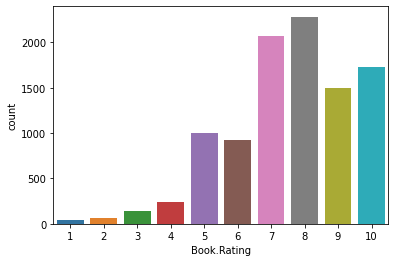

In [12]:
sns.countplot(data=data, x='Book.Rating')

(-0.5, 399.5, 199.5, -0.5)

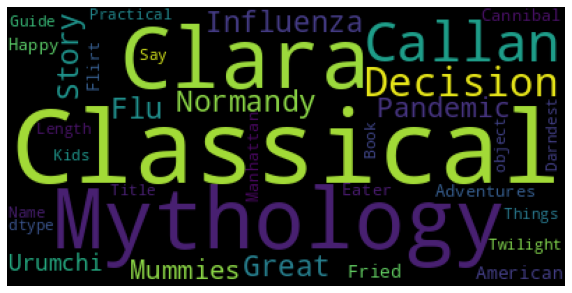

In [13]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_words = 121).generate(str(data['Book.Title']))
plt.imshow(wordcloud)
plt.axis('off')

In [14]:
data['Book.Title'].value_counts()

Fahrenheit 451                                              5
Ender's Game (Ender Wiggins Saga (Paperback))               4
The Amber Spyglass (His Dark Materials, Book 3)             4
Vanished                                                    4
Stardust                                                    4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book.Title, Length: 9659, dtype: int64

### Creating Pivot Table

In [15]:
user_data = data.pivot(index='User.ID', columns='Book.Title', values='Book.Rating').fillna(0)
user_data

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


### Recommendation based on cosine similarity

In [16]:
user_sim = 1- pairwise_distances(user_data.values, metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [17]:
np.fill_diagonal(user_sim, 0)
user_sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
user_sim_df = pd.DataFrame(user_sim, 
                           index=data['User.ID'].unique(), 
                           columns=data['User.ID'].unique())
user_sim_df.head()

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
user_sim_df.sort_values([162103], ascending=False).head()[162103]

3505    0.228717
2596    0.195515
2996    0.000000
2982    0.000000
2983    0.000000
Name: 162103, dtype: float64

In [20]:
data[(data['User.ID']==162103) | (data['User.ID']==3505)]

,User.ID,Book.Title,Book.Rating
6731,3505,The Infinity Concerto,8
9987,162103,Slowness: A Novel,7


In [21]:
data[(data['User.ID']==276726) | (data['User.ID']==162121)]

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
9991,162121,The Cloister Walk,7
9992,162121,Open Water,5
9993,162121,The Evolution of Jane,8
9994,162121,AT PARADISE GATE,8
9995,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


Writing function to get recommendation

In [22]:
def recommend(user_id, top_n=5):
    print('You ask recommendation for this user:\n',data[data['User.ID']==user_id])
    array = user_sim_df.sort_values([user_id],ascending=False).head(top_n).index
    print("==============================================================================\nRecommended titles are:")
    print(data[data['User.ID'].isin(array)])

In [23]:
recommend(162103)

You ask recommendation for this user:
       User.ID         Book.Title  Book.Rating
9987   162103  Slowness: A Novel            7
Recommended titles are:
      User.ID                                   Book.Title  Book.Rating
5719     2596                      My Legendary Girlfriend            5
6142     2982                    Night Visitor (Timeswept)            8
6143     2982                     The Night the Stars Fell            8
6144     2983                               A Man of Steel           10
6149     2996                    Cinnamon (Shooting Stars)            7
6150     2996                                    Home Song            8
6151     2996  Surrender to Love (Avon Historical Romance)            7
6152     2996                                 Spring Fancy            7
6153     2996                                    Surrender            7
6731     3505                        The Infinity Concerto            8


In [24]:
recommend(278831)

You ask recommendation for this user:
       User.ID                                         Book.Title  Book.Rating
2349   278831  Jerk on One End: Reflections of a Mediocre Fis...           10
Recommended titles are:
      User.ID                                         Book.Title  Book.Rating
1      276726                                Classical Mythology            5
6144     2983                                     A Man of Steel           10
6145     2985  Groom For Maggie (Whirlwind Weddings) (Silhoue...            1
6146     2991                                     The Dark Druid            3
6154     3003                                     The Apprentice            5
6155     3003                                  The Seventh Night            7


### Dimension Reductionality Techniques

#### SVD (Single Value Decomposition)
SVD is a dimensionality reduction technique that is commonly used in recommendation systems. Here's an overview of the steps involved in utilizing SVD for recommendation:

- Matrix Preparation: The user-item interaction data is represented as a matrix where rows correspond to users and columns correspond to items. The matrix is typically sparse, with many missing entries.

- SVD Decomposition: SVD is applied to the user-item matrix to decompose it into three matrices: U, Σ, and V^T.
    - U represents the user latent factor matrix and contains information about user preferences and characteristics.
    - Σ is a diagonal matrix that contains singular values, which represent the importance or strength of each latent factor.
    - V^T represents the item latent factor matrix and contains information about item attributes and characteristics.

- Dimensionality Reduction: To handle the sparsity and reduce the dimensionality of the matrices, the singular values and corresponding factors are truncated by selecting the top-k singular values and their corresponding columns from U and V^T. This reduces the dimensionality of the matrices and retains the most important latent factors.

- Generating Recommendations: With the reduced matrices, missing entries in the user-item matrix can be estimated by multiplying the truncated matrices. The predicted values represent the ratings or preferences that the user might give to the items. Based on these predictions, top-N items with the highest predicted ratings can be recommended to the user.

Writing custom class for recommender using svd

In [25]:
class UserBasedRecommender:
    def __init__(self, metric='cosine', n_components=50):
        self.metric = metric
        self.n_components = n_components
        self.data = None
        self.user_sim_df = None
    
    def fit(self, data):
        self.user_data_df = data
        user_data_df = data.pivot(index=data.columns[0], columns=data.columns[1], values=data.columns[2]).fillna(0)

        svd = TruncatedSVD(n_components=self.n_components)
        user_data_svd = svd.fit_transform(user_data_df)
   
        user_sim_matrix = 1 - pairwise_distances(user_data_svd, metric=self.metric)
        np.fill_diagonal(user_sim_matrix, 0)
        
        user_sim_df = pd.DataFrame(user_sim_matrix, index=data.iloc[:, 0].unique(), columns=data.iloc[:, 0].unique())
        self.user_sim_df = user_sim_df

    def recommend(self, user_id, top_n=5):
        print('You asked for recommendations for this user:\n', data[data.iloc[:, 0] == user_id])
        
        user_sim_scores = self.user_sim_df[user_id]
        user_sim_scores = user_sim_scores.sort_values(ascending=False).head(top_n)
        array = list(user_sim_scores.index)
        if user_id in array:
            array.remove(user_id)
        
        print("==============================================================================\nRecommended titles are:")
        print(data[data.iloc[:, 0].isin(array)])

In [26]:
rec = UserBasedRecommender()
rec.fit(data)
rec.recommend(162103,top_n=5)

You asked for recommendations for this user:
       User.ID         Book.Title  Book.Rating
9987   162103  Slowness: A Novel            7
Recommended titles are:
      User.ID                                         Book.Title  Book.Rating
437    277128                                     L'home del sac            6
438    277128                  GrÃ cies per la propina (Columna)            8
824    277433  Scottish Folk and Fairy Tales (Penguin Popular...            5
825    277433          Terrible Times (Eddie Dickens Trilogy S.)            7
5719     2596                            My Legendary Girlfriend            5
6731     3505                              The Infinity Concerto            8
7686     3862        Music of the Swamp (Front Porch Paperbacks)            7


### Recommendation System using various distance metrics

In [27]:
rec = UserBasedRecommender(metric='euclidean')
rec.fit(data)
rec.recommend(162103,top_n=5)

You asked for recommendations for this user:
       User.ID         Book.Title  Book.Rating
9987   162103  Slowness: A Novel            7
Recommended titles are:
      User.ID                                         Book.Title  Book.Rating
991    277574                            Magic House of Numbers.           10
2115   278545                             A Place Called Freedom            9
2116   278545                                       Body Battles            9
2117   278545  The Complete I Ching: The Definitive Translati...            8
8014     4090           Manual Practico del Astronomo Aficionado            8
8015     4090  Amate a TI Mismo: Cambiaras Tu Vida : Manual D...            7
8016     4090  El triÃ¡ngulo (ColecciÃ³n Autores espaÃ±oles e...            8
8017     4090              Las claves de la afectividad femenina            8
8018     4090                         La Historia de San Michele           10
8623   161099                                        The P

In [28]:
rec = UserBasedRecommender(metric='correlation')
rec.fit(data)
rec.recommend(162103,top_n=5)

You asked for recommendations for this user:
       User.ID         Book.Title  Book.Rating
9987   162103  Slowness: A Novel            7
Recommended titles are:
      User.ID                                   Book.Title  Book.Rating
437    277128                               L'home del sac            6
438    277128            GrÃ cies per la propina (Columna)            8
5443     2349  The Ten Thousand: A Novel of Ancient Greece            9
5444     2349        Stell dir vor. Kreativ visualisieren.            3
5719     2596                      My Legendary Girlfriend            5
6731     3505                        The Infinity Concerto            8
7686     3862  Music of the Swamp (Front Porch Paperbacks)            7


In [29]:
rec = UserBasedRecommender(metric='cityblock')
rec.fit(data)
rec.recommend(162103,top_n=5)

You asked for recommendations for this user:
       User.ID         Book.Title  Book.Rating
9987   162103  Slowness: A Novel            7
Recommended titles are:
      User.ID                                         Book.Title  Book.Rating
3885     1267         Battlefield Earth: A Saga of the Year 3000            5
4546     1910                       This is My Daughter: A Novel            7
4547     1915  Dance upon the Air (Three Sisters Island Trilogy)            7
6361     3305  Dr. Pitcairn's Complete Guide to Natural Healt...            7
6362     3305  Mothering the Mother: How a Doula Can Help You...           10
9069   161511          I Don't Know But I've Been Told : A Novel           10
9070   161511                                        Burger Wuss            8
9071   161511                      No Mirrors in My Nana's House            6
9072   161511                  Miguel De Cervantes's Don Quixote            9
9073   161511  You Read to Me &amp; I'll Read to You: Stor